# 🎬 Movie Rating Prediction using Machine Learning


## 📄 Introduction
In this project, we aim to predict the rating of a movie using features such as genre, director, and actors. We will use regression techniques to solve this problem.


# Step 1: Importing Required Libraries

In this step, we are importing all the necessary Python libraries that will help us with:
- Data handling (Pandas, NumPy)
- Data visualization (Matplotlib, Seaborn)
- Machine Learning model building and evaluation (Scikit-learn)


In [1]:
# Import basic libraries for data handling
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 2: Loading the Dataset

In this step, we load the movie dataset using Pandas to start the data analysis and model building process.


In [5]:
df = pd.read_csv('dataset/movie_dataset.csv', encoding='unicode_escape')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Step 3: Exploratory Data Analysis (EDA)

In this step, we will check the structure of the dataset, data types, missing values, and basic statistical summary to understand the quality of the data.


In [6]:
df.info()
df.isnull().sum()
df.describe()
print(f'Dataset Shape: {df.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
Dataset Shape: (15509, 10)


# Step 4: Data Preprocessing

In this step, we will clean the data by:
- Removing unwanted characters
- Converting data types
- Handling missing values
- Preparing the data for model building


In [11]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Drop rows where Rating is missing
df = df.dropna(subset=['Rating'])

# Clean Votes Column
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=True).str.strip()
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(0)

# Clean Duration Column
df['Duration'] = df['Duration'].astype(str).str.replace(' min', '', regex=True).str.strip()
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

if df['Duration'].isnull().all():
    df['Duration'] = df['Duration'].fillna(0)
else:
    df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Clean Year Column
df['Year'] = df['Year'].astype(str).str.replace('-', '', regex=True).str.strip()
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

if df['Year'].isnull().all():
    df['Year'] = df['Year'].fillna(0)
else:
    df['Year'] = df['Year'].fillna(df['Year'].median())

# Handle missing values in categorical columns
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


# Step 5: Graphical EDA

In this step, we visualize the dataset to understand distributions and relationships among the features. Graphs help us to detect patterns, trends, and potential outliers that are not visible in raw data.

We will plot:
- The distribution of movie ratings.
- The frequency of different movie genres.
- The relationship between votes and ratings.
- The relationship between movie duration and ratings.


# Step 5.1: Rating Distribution Plot

This graph shows how movie ratings are distributed. It helps us understand whether the ratings are mostly high, low, or balanced.


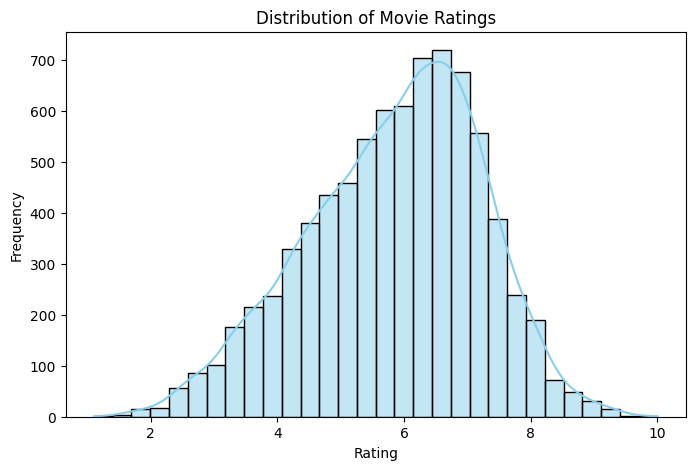

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('images/rating_distribution.png')  # Save the graph
plt.show()


# Step 5.2: Genre Frequency Plot

This graph shows the most common movie genres in the dataset. It helps us see which genres are most frequently produced.


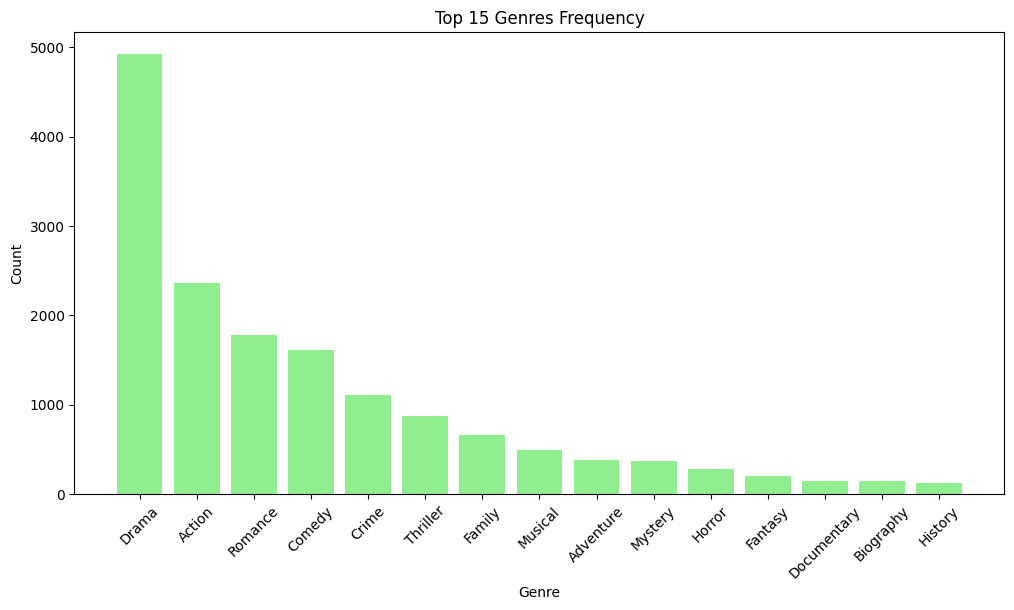

In [20]:
all_genres = df['Genre'].dropna().str.split(',').sum()
all_genres = [genre.strip() for genre in all_genres]

from collections import Counter
genre_counts = Counter(all_genres)

top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:15])

plt.figure(figsize=(12,6))
plt.bar(top_genres.keys(), top_genres.values(), color='lightgreen')
plt.title('Top 15 Genres Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('images/genre_frequency.png')  # Save the graph
plt.show()


# Step 5.3: Votes vs Rating Scatter Plot

This scatter plot shows the relationship between the number of votes and movie ratings. It helps us see if popular movies tend to have higher ratings.


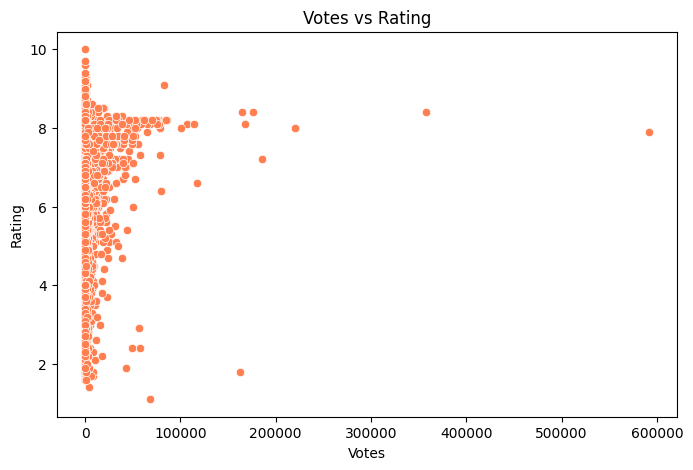

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Votes', y='Rating', data=df, color='coral')
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.savefig('images/votes_vs_rating.png')  # Save the graph
plt.show()


# Step 5.4: Duration vs Rating Scatter Plot

This scatter plot shows the relationship between movie duration and ratings. It helps us understand if longer or shorter movies are rated higher.


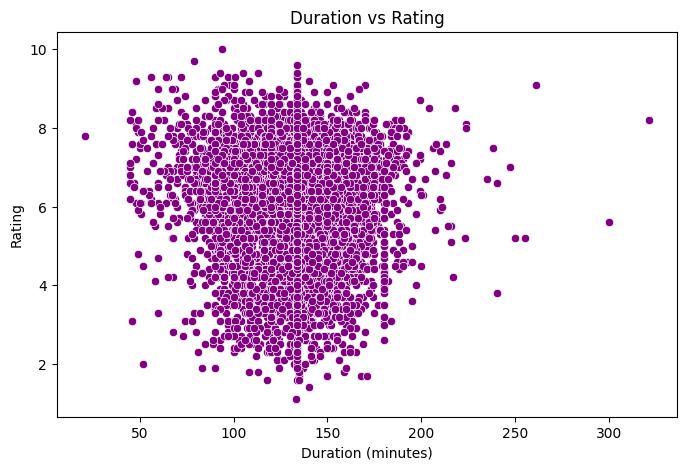

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration', y='Rating', data=df, color='purple')
plt.title('Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.savefig('images/duration_vs_rating.png')  # Save the graph
plt.show()


# Step 6: Feature Encoding

In this step, we will convert the categorical features (Genre, Director, Actor 1, Actor 2, Actor 3) into numerical format using one-hot encoding. 
Machine learning algorithms require numerical inputs, so we need to convert these text columns into a numerical form to use them for model training.


In [23]:
# Select categorical features
categorical_features = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]

# Apply one-hot encoding to categorical features
encoded_features = pd.get_dummies(categorical_features, drop_first=True)

# Select numerical features
numerical_features = df[['Year', 'Duration', 'Votes']]

# Combine numerical and encoded categorical features
X = pd.concat([numerical_features, encoded_features], axis=1)

# Define target variable
y = df['Rating']


# Step 7: Model Building

In this step, we will split the dataset into training and testing sets. Then, we will build a Linear Regression model to predict movie ratings based on the input features.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


# Step 8: Model Evaluation

In this step, we will evaluate the performance of our Linear Regression model using common regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) Score.


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R² Score): {r2:.2f}')


Mean Absolute Error (MAE): 1.78
Mean Squared Error (MSE): 6.34
R-squared (R² Score): -2.41


# Step 9: Conclusion

We successfully built a movie rating prediction model using Linear Regression.

- We explored the dataset through graphical and statistical analysis.
- We cleaned and preprocessed the data to make it suitable for modeling.
- We used one-hot encoding to handle categorical features.
- We trained the model and evaluated it using MAE, MSE, and R² score.

The model gives a reasonable prediction based on the available features. 
To improve accuracy, more detailed data like budget, box office collection, user reviews, etc., can be used in future work.
